# # OSM etymology data for verification

## Get OSM data
Query all streets with existing etymology designation in Switzerland

In [152]:
#Load all needed libraries
import requests
import pandas as pd
import osm2geojson
import geopandas as gpd
from time import process_time_ns
import numpy as np
from SPARQLWrapper import SPARQLWrapper, JSON
import seaborn as sebrn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as atlas
import warnings
from functools import reduce  

Testing your query for needed OSM informations: https://overpass-turbo.osm.ch/

Data model for streets (topic : highway): https://wiki.openstreetmap.org/wiki/Key%3ahighway

<font color='red'>WARNING</font> takes a couple of minutes to retrieve data for entire Switzerland

<font color='blue'>IMPORTANT</font> filter only name:etymology:wikidata (https://wiki.openstreetmap.org/wiki/Key:name:etymology:wikidata)

In [22]:
#overpass_url = "http://overpass-api.de/api/interpreter"
overpass_url = "https://lz4.overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="CH"];
(
nwr["name:etymology:wikidata"]["highway"](area);
);
(._;>;);
out body;
"""
response = requests.get(overpass_url, data = overpass_query)
print(response)

<Response [200]>


In [23]:
data = response.json()
#data

In [24]:
dfp = pd.DataFrame(data["elements"])
dfp

,type,id,lat,lon,tags,nodes,members
0,node,172271,46.524137,6.594365,NaN,NaN,NaN
1,node,172272,46.524011,6.595446,NaN,NaN,NaN
2,node,172273,46.523461,6.597860,NaN,NaN,NaN
3,node,172274,46.523198,6.599370,NaN,NaN,NaN
4,node,280590,46.516906,6.615215,NaN,NaN,NaN
...,...,...,...,...,...,...,...
31351,relation,3400183,NaN,NaN,"{'highway': 'pedestrian', 'layer': '5', 'name'...",NaN,"[{'type': 'way', 'ref': 68687544, 'role': 'inn..."
31352,relation,4800640,NaN,NaN,"{'area': 'yes', 'highway': 'pedestrian', 'lit'...",NaN,"[{'type': 'way', 'ref': 86090007, 'role': 'out..."
31353,relation,8437762,NaN,NaN,"{'alt_name': 'Le Corbusier-Platz', 'highway': ...",NaN,"[{'type': 'way', 'ref': 606423418, 'role': 'ou..."
31354,relation,8688199,NaN,NaN,"{'bicycle': 'yes', 'highway': 'pedestrian', 'l...",NaN,"[{'type': 'way', 'ref': 343989936, 'role': 'ou..."


In [25]:
geojson = osm2geojson.json2geojson(data)
#geojson

In [26]:
geom = gpd.GeoDataFrame.from_features(geojson, crs="EPSG:4326")
geom

,geometry,type,id,tags,nodes
0,POINT (8.25699 46.89458),node,40128715,"{'highway': 'motorway_junction', 'name': 'Sarn...",NaN
1,POINT (8.43598 46.97224),node,249282757,"{'highway': 'motorway_junction', 'name': 'Buoc...",NaN
2,POINT (8.34915 46.96803),node,292003425,"{'highway': 'motorway_junction', 'name': 'Stan...",NaN
3,POINT (7.43698 46.94589),node,443705798,"{'addr:city': 'Bern', 'addr:country': 'CH', 'a...",NaN
4,POINT (7.43679 46.94590),node,443705802,"{'addr:city': 'Bern', 'addr:country': 'CH', 'a...",NaN
...,...,...,...,...,...
4327,"MULTILINESTRING ((7.42169 46.94472, 7.42177 46...",relation,7757,"{'highway': 'secondary', 'name': 'Effingerstra...",NaN
4328,"MULTIPOLYGON (((6.63465 46.52260, 6.63461 46.5...",relation,1715790,"{'area': 'yes', 'highway': 'pedestrian', 'name...",NaN
4329,"MULTIPOLYGON (((6.63061 46.52095, 6.63049 46.5...",relation,4800640,"{'area': 'yes', 'highway': 'pedestrian', 'lit'...",NaN
4330,"MULTIPOLYGON (((7.37492 46.94708, 7.37492 46.9...",relation,8437762,"{'alt_name': 'Le Corbusier-Platz', 'highway': ...",NaN


In [27]:
info = pd.json_normalize(geom.to_dict('list'), ['tags'])
pd.options.display.max_rows = 50
pd.options.display.max_columns = 300
info.head(5)

,highway,name,name:etymology:wikidata,ref,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street,entrance,public_transport,trolleybus,alt_name,brand,bus,ele,network,operator,shelter,source,uic_name,uic_ref,website,wheelchair,bench,bin,lit,tactile_paving,wlan,covered,network:wikidata,cycleway:both,lane_markings,maxspeed,sidewalk,surface,trolley_wire,motor_vehicle,oneway,cycleway,oneway:bicycle,lanes,lcn,note,owner,smoothness,wikidata,foot,name:etymology:wikipedia,bicycle:backward,bicycle:left,bus:lanes:backward,cycleway:right,lanes:backward,lanes:forward,old_name,vehicle:lanes:backward,turn:lanes:backward,turn:lanes:forward,bicycle:forward,bridge,cycleway:left,layer,maxweight:signed,motorcar:conditional,motorcycle:conditional,access,vehicle,sidewalk:both:surface,incline,noexit,shoulder,psv,sidewalk:left,sidewalk:right,check_date:cycleway,cycleway:left:lane,cycleway:left:oneway,image,name:source,name:start_date,wikimedia_commons,rcrc_ref,access:lanes:backward,bicycle:lanes:backward,cycleway:lanes:backward,official_name,junction,cycleway:right:lane,trolley_wire:backward,lanes:unmarked,mapillary,service,bicycle,dog,maxspeed:type,source:maxspeed,fixme,source:width,width,lanes:psv:backward,tunnel,cycleway:both:lane,access:conditional,wikipedia,lanes:psv:forward,source:name,maxheight,maxweight,turn:lanes,nat_ref,reg_ref,bicycle:lanes:forward,cycleway:lanes:forward,motor_vehicle:lanes:forward,motorcar,motorcycle,destination:backward,destination:lanes,day_off,day_on,hour_off,hour_on,tracktype,oneway:bus,oneway:moped,oneway:psv,access:lanes:forward,parking:lane:both,segregated,taxi,horse,handrail:left,ramp,step_count,sidewalk:left:surface,parking:lane:right,parking:lane:right:parallel,loc_ref,mofa,mofa:backward,motor_vehicle:backward,psv:backward,psv:lanes:forward,area,busway:left,lanes:psv,psv:lanes,parking:lane:left,parking:lane:left:parallel,cyclestreet,old_name:-1934,sac_scale,vehicle:lanes,sidewalk:right:surface,railway,hgv,handrail,busway:right,cycleway:right:oneway,oneway:foot,embankment,crossing,cycleway:surface,footway:surface,motor_vehicle:conditional,access:backward,short_name,crossing:island,footway,maxlength,sidewalk:both,destination:forward,destination:symbol:forward,start_date,disabled,destination,check_date:surface,agricultural,placement,oneway:hgv,bridge:name,parking:condition:right,parking:condition:right:maxstay,parking:condition:right:residents,level,check_date,proposed:trolley_wire,car,traffic_calming,vehicle:lanes:forward,oneway:mofa,postal_code,old_name:-2006,parking:lane,name:etymology,start_date:name,ramp:wheelchair,moped,handrail:right,psv:lanes:backward,parking:condition:both,parking:condition:both:maxstay,parking:condition:both:residents,avz,cs_dir:backward,cs_dir:forward,destination:symbol,maxspeed:backward,maxspeed:forward,lanes:directions,handrail:center,ford,mtb:scale,mtb:scale:imba,mtb:scale:uphill,trail_visibility,place,turn,loc_name,parking:condition:right:2,parking:condition:right:2:maxstay,parking:condition:right:2:time_interval,parking:condition:right:3,parking:condition:right:3:time_interval,parking:condition:right:default,parking:condition:right:time_interval,parking:lane:right:capacity,description,departures_board,overtaking,destination:lanes:backward,kerb:left,noname,cycleway:lane,pedestrian_lane,check_date:ramp,parking:condition:left,parking:lane:left:capacity,traffic_sign,trailer,cycleway:left:segregated,was:foot,bus:backward,type
0,motorway_junction,Sarnen Nord,Q63964,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [28]:
most_common = info.groupby("highway").count()
most_common.name.nlargest(10)

highway
residential      1569
footway           533
secondary         471
tertiary          381
primary           304
service           273
living_street     209
unclassified      201
pedestrian        134
steps              96
Name: name, dtype: int64

In [29]:
verif = info[['name','name:etymology:wikidata']]
verif

,name,name:etymology:wikidata
0,Sarnen Nord,Q63964
1,Buochs,Q64567
2,Stans Nord,Q63931
3,NaN,Q1296211
4,NaN,Q1296211
...,...,...
4327,Effingerstrasse,Q1296211
4328,Place de la Cathédrale,Q669544
4329,Place de l'Europe,Q46
4330,Le-Corbusier-Platz,Q4724


In [30]:
#Drop when missing data
missing_data = pd.DataFrame(
    verif.isnull().sum(),
    columns=['Missing Values'])

print(missing_data)

verif = verif.dropna()

                         Missing Values
name                                 19
name:etymology:wikidata               0


In [31]:
#Drop duplicates
uniqueValues = verif.drop_duplicates()
uniqueValues

,name,name:etymology:wikidata
0,Sarnen Nord,Q63964
1,Buochs,Q64567
2,Stans Nord,Q63931
12,Tavelweg,Q124667
15,Willadingweg,Q1693700
...,...,...
3998,Hintere Erlachstrasse,Q123886
3999,Hardungweg,Q1495926
4000,Spühlweg,Q78071721;Q106809423
4001,Spühlstrasse,Q78071721;Q106809423


In [32]:
duplicateRows = uniqueValues[uniqueValues.duplicated(['name'])]
duplicateRows

,name,name:etymology:wikidata
510,Avenue de la Gare,Q669678
895,Weberstrasse,Q55903732
965,Schillerstrasse,Q107030305;Q22670
980,Place de la Gare,Q669678
1112,Simonstrasse,Q23063169
1352,Fröbelstrasse,Q76679
1759,Rue de la Tour,Q3533300
1776,Schlatterstrasse,Q43136553
2177,Hiltystrasse,Q55196805;Q120960


Drop these 9 non unique names

In [33]:
uniqueValues = uniqueValues.drop_duplicates(subset=['name'])

Only keep first QID per name

In [34]:
uniqueValues['name:etymology:wikidata'] = uniqueValues['name:etymology:wikidata'].str.replace("(;).*","", regex=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_1736\3111103421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniqueValues['name:etymology:wikidata'] = uniqueValues['name:etymology:wikidata'].str.replace("(;).*","", regex=True)


Rename columns

In [35]:
uniqueValues.columns = ['name', 'qid']

# Add instanceLabel, sex and dateOfBirth from wikidata 

<font color='blue'>IMPORTANT</font> We need that instance (class) of the "thing" the street is named after to be able to classify. Data was not found via OSM.

Testing Queries under https://query.wikidata.org/#

In [36]:
#sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

In [37]:
wdUrl = "https://query.wikidata.org/sparql"
user_agent = 'Streetnamequery/1.0 (https://github.com/CaptainInler/cassda-zertifikatsarbeit)'
sparql = SPARQLWrapper(wdUrl, agent=user_agent)

In [38]:
def queryInstance(sparql, subject):
    #print(wdKey)
    query = """
    SELECT  ?item ?instanceLabel ?dateOfBirth ?sexLabel ?pic
    WHERE
    {
      ?item wdt:P31 ?instance.
      FILTER(?item = wd:%s)
      OPTIONAL {?item wdt:P569 ?dateOfBirth  . }
      OPTIONAL {?item wdt:P21 ?sex  . }
      OPTIONAL {?item wdt:P18 ?pic  . }
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]". }
    }
    LIMIT 1
    """ % (subject)
    #print(query)
    
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql

In [39]:
def get_retry_after():
    response = requests.get(wdUrl)
    retry_after = response.getheader("Retry-After")

    if retry_after is None:
        return None

    print(retry_after)

<font color='red'>WARNING</font> takes about 10 minutes to retrieve data from wikidata

<font color='blue'>IMPORTANT</font> Sollte ein Statuscode 429 auftreten: Anfrage in ca. 30sec wiederholen
HTTP Error 429: Too Many Requests

In [40]:
i = 0
dfr = pd.DataFrame(columns=["qid", "name", "instanceLabel", "dateBirth", "sexLabel", "pic"])

maxresults = 1200

for x in uniqueValues.index:
    i+=1
    #print(i)
    subject = uniqueValues['qid'][x]
    subjectStr = uniqueValues['name'][x]
    #print(f"Subjekt: {subject}")
    sparql = queryInstance(sparql, subject)
    #print(sparql)
    try:
        results = sparql.query()
        #print(results.info())
    except Exception as e:
        #Prüfen auf Statuscode 429 (Too many Requests). Leider kann der Statuscode nicht abgerufen werden..
        print("Sollte ein Statuscode 429 auftreten: Anfrage in ca. 30sec wiederholen")
        print(e)
        get_retry_after()
        break

    result = results.convert()
    #print(result)

    results_df = pd.json_normalize(result['results']['bindings'])
    #print(results_df)

    if not results_df.empty:
        instanceLabel = results_df['instanceLabel.value'][0]
        try:
            dateBirth = results_df['dateOfBirth.value'][0]
        except:
            dateBirth = '9999'
        try:
            sexLabel = results_df['sexLabel.value'][0]
        except:
            sexLabel = 'kein'
        try:
            pic = results_df['pic.value'][0]
        except:
            pic = 'kein'


        #print(f"{subject} | {subjectStr}: {instanceLabel} / {dateBirth} / {sexLabel}  / {pic}")
        dfrtemp = pd.DataFrame([[subject, subjectStr, instanceLabel, dateBirth, sexLabel, pic]], columns=dfr.columns)
        dfr = pd.concat([dfr, dfrtemp])

    else:
        #print(f"{subjectStr} | {subject}: Kein Eintrag in Wikidata gefunden")
        dfrtemp = pd.DataFrame([[subject, subjectStr, np.nan, np.nan, np.nan, np.nan]], columns=dfr.columns)
        dfr = pd.concat([dfr, dfrtemp])

    #print(x)
    if i > maxresults:
        break

In [41]:
dfr.head()

,qid,name,instanceLabel,dateBirth,sexLabel,pic
0,Q63964,Sarnen Nord,Q5119,9999,kein,http://commons.wikimedia.org/wiki/Special:File...
0,Q64567,Buochs,Q70208,9999,kein,http://commons.wikimedia.org/wiki/Special:File...
0,Q63931,Stans Nord,Q70208,9999,kein,http://commons.wikimedia.org/wiki/Special:File...
0,Q124667,Tavelweg,Q5,1866-12-21T00:00:00Z,Q6581097,http://commons.wikimedia.org/wiki/Special:File...
0,Q1693700,Willadingweg,Q5,1641-01-01T00:00:00Z,Q6581097,http://commons.wikimedia.org/wiki/Special:File...


Add sex label

In [42]:
most_common = dfr.groupby("sexLabel").count()
most_common.name.nlargest(10)

sexLabel
Q6581097    668
kein        275
Q6581072    132
Name: name, dtype: int64

In [43]:
sex_dict = {
    'Q6581097': 'male', 
    'Q6581072': 'female', 
    'kein': ''
}

In [44]:
dfr['sex'] = dfr['sexLabel'].map(sex_dict)

Add instance label

In [45]:
most_common = dfr.groupby("instanceLabel").count()
pd.set_option('display.max_rows', 100)
most_common.name.nlargest(10)

instanceLabel
Q5           780
Q16521        49
Q70208        32
Q8502         21
Q8436         17
Q11879590      9
Q13417114      9
Q16970         9
Q55983715      8
Q133056        7
Name: name, dtype: int64

Manually classyfying top 20 wiki instances

In [46]:
instance_dict = instance_dict={'Q5':'Person',
'Q16521':'Lebewesen',
'Q70208':'Ortschaft',
'Q8436':'Person',
'Q8502':'Berg',
'Q11879590':'Person',
'Q13417114':'Person',
'Q16970':'Religion',
'Q55983715':'Lebewesen',
'Q133056':'Berg',
'Q5119':'Ortschaft',
'Q4022':'Gewässer',
'Q158438':'Siedlung',
'Q23442':'Natur',
'Q28640':'Beruf',
'Q839954':'Natur',
'Q101352':'Person',
'Q11688446':'Religion',
'Q15632617':'Andere',
'Q205985':'Religion',
'Q2354973':'Siedlung',
'Q46831':'Berg',
'Q484170':'Ortschaft',
'Q33215':'Andere',
'Q1061151':'Berg',
'Q6256':'Ortschaft',
'Q123705':'Ortschaft',
'Q511056':'Religion',
'Q12518':'Siedlung',
'Q486972':'Siedlung',
'Q12737077':'Beruf',
'Q13406463':'Andere',
'Q39816':'Natur',
'Q1589492':'Religion',
'Q3318733':'Andere',
'Q28061975':'Religion',
'Q245065':'Andere',
'Q23718':'Natur',
'Q178885':'Religion',
'Q20643955':'Religion',
'Q174782':'Siedlung',
'Q1428660':'Gewässer',
'Q2058199':'Person',
'Q211302':'Gewässer',
'Q515':'Ortschaft',
'Q483110':'Siedlung',
'Q190752':'Siedlung',
'Q18358548':'Lebewesen',
'Q506':'Lebewesen',
'Q5107':'Ortschaft',
'Q12507':'Andere',
'Q514999':'Berg',
'Q62049':'Andere',
'Q1470705':'Religion',
'Q1311958':'Siedlung',
'Q1681353':'Natur',
'Q66016':'Religion',
'Q167270':'Andere',
'Q728937':'Siedlung',
'Q747074':'Ortschaft',
'Q751876':'Siedlung',
'Q82794':'Natur',
'Q11042':'Andere',
'Q1094545':'Andere',
'Q4830453':'Andere',
'Q41172303':'Andere',
'Q4271324':'Religion',
'Q1364':'Lebewesen',
'Q22988604':'Religion',
'Q23413':'Siedlung',
'Q142031':'Siedlung',
'Q14073567':'Person',
'Q2095':'Andere',
'Q24354':'Siedlung',
'Q249556':'Andere',
'Q25235':'Andere',
'Q27096235':'Natur',
'Q2977':'Siedlung',
'Q22698':'Siedlung',
'Q3305213':'Andere',
'Q198':'Andere',
'Q3591867':'Ortschaft',
'Q3624078':'Ortschaft',
'Q3777462':'Berg',
'Q3958441':'Andere',
'Q3977906':'Berg',
'Q1916821':'Religion',
'Q1914636':'Andere',
'Q1569856':'Religion',
}

In [47]:
dfr['instance'] = dfr['instanceLabel'].map(instance_dict)

In [48]:
dfr

,qid,name,instanceLabel,dateBirth,sexLabel,pic,sex,instance
0,Q63964,Sarnen Nord,Q5119,9999,kein,http://commons.wikimedia.org/wiki/Special:File...,,Ortschaft
0,Q64567,Buochs,Q70208,9999,kein,http://commons.wikimedia.org/wiki/Special:File...,,Ortschaft
0,Q63931,Stans Nord,Q70208,9999,kein,http://commons.wikimedia.org/wiki/Special:File...,,Ortschaft
0,Q124667,Tavelweg,Q5,1866-12-21T00:00:00Z,Q6581097,http://commons.wikimedia.org/wiki/Special:File...,male,Person
0,Q1693700,Willadingweg,Q5,1641-01-01T00:00:00Z,Q6581097,http://commons.wikimedia.org/wiki/Special:File...,male,Person
...,...,...,...,...,...,...,...,...
0,Q123886,Hintere Erlachstrasse,Q5,1299-01-01T00:00:00Z,Q6581097,http://commons.wikimedia.org/wiki/Special:File...,male,Person
0,Q1495926,Hardungweg,Q5,1861-11-03T00:00:00Z,Q6581097,kein,male,Person
0,Q78071721,Spühlweg,Q5,1916-09-03T00:00:00Z,Q6581097,kein,male,Person
0,Q78071721,Spühlstrasse,Q5,1916-09-03T00:00:00Z,Q6581097,kein,male,Person


In [49]:
most_common = dfr.groupby("instance").count()
most_common.name.nlargest(15)

instance
Person       821
Lebewesen     60
Ortschaft     50
Berg          36
Religion      31
Andere        25
Siedlung      23
Natur         15
Gewässer       8
Beruf          6
Name: name, dtype: int64

## merge verification data to streetnames via name 

In [50]:
# Street name designations
streetnames = pd.read_csv('../Datapreparation/streetnames.csv', encoding='UTF-8-SIG', sep=';')

<font color='red'>WARNING</font> ambiguity of names is not considered. Could be considered by spatial restriction but was left out here. 

In [147]:
merge = pd.merge(dfr, streetnames, left_on=['name'], right_on=['STN_LABEL'])
merge

,qid,name,instanceLabel,dateBirth,sexLabel,pic,sex,instance,Unnamed: 0,STR_ESID,STN_LABEL,COM_FOSNR,COM_NAME,COM_CANTON,STR_OFFICIAL,STR_EASTING,STR_NORTHING,STN_LABEL_NO_BI,STN_LABEL_NO_TERMS,STR_TERMS,STR_PREPS,STN_LABEL_FINAL
0,Q124667,Tavelweg,Q5,1866-12-21T00:00:00Z,Q6581097,http://commons.wikimedia.org/wiki/Special:File...,male,Person,3313,10022177,Tavelweg,2275,Murten,FR,True,2576509.0,1197547.0,Tavelweg,Tavel,weg,NaN,Tavel
1,Q124667,Tavelweg,Q5,1866-12-21T00:00:00Z,Q6581097,http://commons.wikimedia.org/wiki/Special:File...,male,Person,78725,10089404,Tavelweg,387,Lengnau (BE),BE,True,2594575.0,1225189.0,Tavelweg,Tavel,weg,NaN,Tavel
2,Q124667,Tavelweg,Q5,1866-12-21T00:00:00Z,Q6581097,http://commons.wikimedia.org/wiki/Special:File...,male,Person,80161,10117105,Tavelweg,356,Muri bei Bern,BE,True,2603562.0,1197746.0,Tavelweg,Tavel,weg,NaN,Tavel
3,Q124667,Tavelweg,Q5,1866-12-21T00:00:00Z,Q6581097,http://commons.wikimedia.org/wiki/Special:File...,male,Person,83217,10012974,Tavelweg,979,Herzogenbuchsee,BE,True,2620038.0,1225679.0,Tavelweg,Tavel,weg,NaN,Tavel
4,Q124667,Tavelweg,Q5,1866-12-21T00:00:00Z,Q6581097,http://commons.wikimedia.org/wiki/Special:File...,male,Person,83516,10198126,Tavelweg,880,Rüeggisberg,BE,True,2602847.0,1187735.0,Tavelweg,Tavel,weg,NaN,Tavel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,Q123886,Hintere Erlachstrasse,Q5,1299-01-01T00:00:00Z,Q6581097,http://commons.wikimedia.org/wiki/Special:File...,male,Person,153401,10225984,Hintere Erlachstrasse,3203,St. Gallen,SG,True,2743189.0,1252886.0,Hintere Erlachstrasse,Erlach,strasse,hinter,Erlach
4360,Q1495926,Hardungweg,Q5,1861-11-03T00:00:00Z,Q6581097,kein,male,Person,152103,10225832,Hardungweg,3203,St. Gallen,SG,True,2748092.0,1254605.0,Hardungweg,Hardung,weg,NaN,Hardung
4361,Q78071721,Spühlweg,Q5,1916-09-03T00:00:00Z,Q6581097,kein,male,Person,165667,10246955,Spühlweg,3203,St. Gallen,SG,True,2749581.0,1256161.0,Spühlweg,Spühl,weg,NaN,Spühl
4362,Q78071721,Spühlstrasse,Q5,1916-09-03T00:00:00Z,Q6581097,kein,male,Person,165964,10246954,Spühlstrasse,3203,St. Gallen,SG,True,2749624.0,1256261.0,Spühlstrasse,Spühl,strasse,NaN,Spühl


In [148]:
merge = merge.drop(['name', 'sexLabel', 'Unnamed: 0', 'COM_FOSNR','COM_NAME' ,'COM_CANTON','STR_OFFICIAL',
                   'STR_EASTING','STR_NORTHING','STN_LABEL_NO_BI', 'STN_LABEL_NO_TERMS','STR_TERMS','STR_PREPS'], axis=1)

## Add more verification data by manually classifying streets with described special street designation from Zurich and Basel 

Download data from Zurich https://data.stadt-zuerich.ch/dataset/geo_strassennamenverzeichnis#dataset and read them into a dataframe 

In [52]:
zh_data = pd.read_csv('data/in_data_zh.csv', encoding='UTF-8-SIG', sep=';')

In [53]:
zh_data.head()

,id,str_nr,str_name,str_st_bezeichnung,str_von,str_bis,str_kreis,str_planquadrat,str_vb,str_up_kanton,snb_str_nr_ref,snb_erlaeuterung,snb_tafeltext_1,snb_tafeltext_2,objectid
0,437.0,2516.0,A1,gültig,Grenze Regensdorf Wehntalerstrasse,Grenze Opfikon Schaffhauserstrasse,11,H-P 6,AF/SE,1907+1908+2006+2007+2008,2516.0,"Die A1, d. h. Autobahn 1, verbindet als West-O...",NaN,NaN,6395.0
1,2136.0,2517.0,A1H,gültig,Grenze Oberengstringen,Bernerstrasse Nord /Pfingstweidbrücke,9,G 9-J 10,AL,2205+2206,2517.0,Der A1H ist der Autobahnzubringer Zürich-Hardt...,NaN,NaN,8096.0
2,332.0,2518.0,A1L,gültig,Grenze Opfikon A1,Süd-Portal Milchbucktunnel /Wasserwerkstrasse,6+11+12,N 11-Q 9,OB/OE/UN/SW,2108+2208+2307+2308,2518.0,Der A1L ist der Autobahnzubringer Zürich-Lette...,NaN,NaN,6283.0
3,1247.0,2519.0,A3,gültig,Grenze Stallikon Uetlibergtunnel,Grenze Adliswil Albisstrasse,2+3,J 17-M 19,LE/WD/WO,2606+2607+2707,2519.0,"Die A3, d. h. Autobahn 3, verläuft auf der Str...",NaN,NaN,7207.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Only keep columns containing streetnames (to match with our streetnames) and designation description and drop nans

In [70]:
zh_data = zh_data[['str_name', 'snb_erlaeuterung']].dropna()

Merge our streetnames to make sure we manually classify only streets that we can match with our streetnames and that are not already in our verification dataset 

In [203]:
merge_zh = pd.merge(streetnames, zh_data, left_on=['STN_LABEL'], right_on=['str_name'])
merge_zh = pd.merge(merge, merge_zh, left_on=['STN_LABEL'], right_on=['str_name'], how ="right")

In [204]:
merge_zh = merge_zh[['str_name','STR_ESID_y', 'snb_erlaeuterung','STN_LABEL_y', 'instance']]
merge_zh = merge_zh.drop_duplicates(subset=['str_name'])
merge_zh = merge_zh[merge_zh['instance'].isna()]

In [205]:
merge_zh.rename(columns = {'STR_ESID_y':'STR_ESID', 'STN_LABEL_y':'STN_LABEL'}, inplace = True)
merge_zh.head()

,str_name,STR_ESID,snb_erlaeuterung,STN_LABEL,instance
0,Brunngasse,10096235,Im Jahr 1242 erstmals erwähnte Bezeichnung für...,Brunngasse,NaN
31,Poststrasse,10103841,In den Jahren 1835-1838 angelegte neue Hauptve...,Poststrasse,NaN
201,Zurlindenstrasse,10108763,Benannt nach der 1396 erstmals bezeugten und i...,Zurlindenstrasse,NaN
205,Talstrasse,10069751,Zweite Längsstrasse im Talackerquartier. Der v...,Talstrasse,NaN
285,Grabenweg,10141751,Weg entlang eines Bach- oder Entwässerungsgrab...,Grabenweg,NaN


In [175]:
merge_zh.to_csv(r'C:\CAS_Arbeit\cassda-zertifikatsarbeit\Evaluation\data\out_merge_zh.csv', encoding='UTF-8-SIG', sep=';')

In [206]:
merge_zh = pd.read_csv('data/in_merge_zh.csv', encoding='UTF-8-SIG', sep=';')

In [207]:
merge_zh

,Unnamed: 0,str_name,STR_ESID,snb_erlaeuterung,STN_LABEL,instance
0,0,Brunngasse,10096235,Im Jahr 1242 erstmals erwähnte Bezeichnung für...,Brunngasse,Siedlung
1,31,Poststrasse,10103841,In den Jahren 1835-1838 angelegte neue Hauptve...,Poststrasse,Siedlung
2,201,Zurlindenstrasse,10108763,Benannt nach der 1396 erstmals bezeugten und i...,Zurlindenstrasse,Person
3,205,Talstrasse,10069751,Zweite Längsstrasse im Talackerquartier. Der v...,Talstrasse,Natur
4,285,Grabenweg,10141751,Weg entlang eines Bach- oder Entwässerungsgrab...,Grabenweg,Natur
...,...,...,...,...,...,...
2110,51370,Lintheschergasse,10098539,Hans Conrad Escher von der Linth (1767-1823): ...,Lintheschergasse,NaN
2111,51371,Im alten Brunnen,10249416,"Flurname, bezeichnet vermutlich eine alte Quel...",Im alten Brunnen,NaN
2112,51372,Bolleystrasse,10081626,Pompejus Alexander Bolley (1812-1870): Profess...,Bolleystrasse,NaN
2113,51373,Johannes-Ott-Weg,10152458,Johann Jakob Ott (1715-1769): Besitzer des Nür...,Johannes-Ott-Weg,NaN


In [208]:
merge_zh = merge_zh.loc[merge_zh.instance.notnull()]

In [209]:
merge_zh

,Unnamed: 0,str_name,STR_ESID,snb_erlaeuterung,STN_LABEL,instance
0,0,Brunngasse,10096235,Im Jahr 1242 erstmals erwähnte Bezeichnung für...,Brunngasse,Siedlung
1,31,Poststrasse,10103841,In den Jahren 1835-1838 angelegte neue Hauptve...,Poststrasse,Siedlung
2,201,Zurlindenstrasse,10108763,Benannt nach der 1396 erstmals bezeugten und i...,Zurlindenstrasse,Person
3,205,Talstrasse,10069751,Zweite Längsstrasse im Talackerquartier. Der v...,Talstrasse,Natur
4,285,Grabenweg,10141751,Weg entlang eines Bach- oder Entwässerungsgrab...,Grabenweg,Natur
...,...,...,...,...,...,...
276,44000,Altweg,10075512,Verkürzte Form des Flurnamens «im alten Weg» (...,Altweg,Andere
277,44026,Baumschulweg,10194291,Weg zur Baumschule oberhalb des Schiessplatzes...,Baumschulweg,Siedlung
278,44035,Eichacker,10072830,Flurname: Acker in der Nähe einer Eiche oder e...,Eichacker,Lebewesen
279,44040,Geerenweg,10030931,"Flurname «Geeren», d. h. in einem spitzen Wink...",Geerenweg,Siedlung


In [ ]:
##write out merge

In [ ]:
##write out merge_zh

## Create confusion matrix

In [216]:
out_mapping = pd.read_csv('../Modeling/out_mapping.csv', encoding='UTF-8-SIG', sep=';')

In [260]:
confusion_all = reduce(lambda left, right:     # Merge three pandas DataFrames
                     pd.merge(left , right,
                              on = ["STR_ESID"],
                              how = "outer"),
                     [out_mapping, merge, merge_zh])

In [262]:
confusion_all = confusion_all.drop(['Unnamed: 0_x', 'COM_FOSNR','COM_NAME' ,'COM_CANTON','STR_OFFICIAL',
                   'STR_EASTING','STR_NORTHING','STN_LABEL_NO_BI', 'STN_LABEL_NO_TERMS','STR_TERMS','STR_PREPS',
                  'STN_LABEL_FINAL_x','STN_LABEL_FINAL_y','Unnamed: 0_y'], axis=1)

In [263]:
confusion_all.columns

Index(['STR_ESID', 'SPACY_DE', 'SPACY_DE_LEMMA', 'SPACY_DE_ENT', 'SPACY_FR',
       'SPACY_FR_LEMMA', 'SPACY_FR_ENT', 'STN_LABEL_x', 'DIC_Lebewesen',
       'DIC_Ortschaft', 'DIC_Berufe', 'DIC_Gewässer', 'DIC_Berg',
       'DIC_Siedlung', 'DIC_Religion', 'DIC_Natur', 'classif', 'qid',
       'instanceLabel', 'dateBirth', 'pic', 'sex', 'instance_x', 'STN_LABEL_y',
       'str_name', 'snb_erlaeuterung', 'STN_LABEL', 'instance_y'],
      dtype='object')

In [264]:
confusion_all = confusion_all.assign(instance=test['instance_x'].mask(test['instance_x'].isna(), test['instance_y']))

In [266]:
confusion_all = confusion_all.loc[confusion_all.instance.notnull()]

In [267]:
confusion = confusion_all.drop_duplicates(subset=['STN_LABEL_x'])

In [268]:
confusion

,STR_ESID,SPACY_DE,SPACY_DE_LEMMA,SPACY_DE_ENT,SPACY_FR,SPACY_FR_LEMMA,SPACY_FR_ENT,STN_LABEL_x,DIC_Lebewesen,DIC_Ortschaft,DIC_Berufe,DIC_Gewässer,DIC_Berg,DIC_Siedlung,DIC_Religion,DIC_Natur,classif,qid,instanceLabel,dateBirth,pic,sex,instance_x,STN_LABEL_y,str_name,snb_erlaeuterung,STN_LABEL,instance_y,instance
4,10096235,Brunn,Brunn,NaN,Brunn,Brunn,NaN,Brunngasse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andere,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brunngasse,Im Jahr 1242 erstmals erwähnte Bezeichnung für...,Brunngasse,Siedlung,Siedlung
6,10103841,Post,Post,NaN,Post,Post,NaN,Poststrasse,NaN,NaN,NaN,NaN,NaN,post,NaN,NaN,Siedlung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poststrasse,In den Jahren 1835-1838 angelegte neue Hauptve...,Poststrasse,Siedlung,Siedlung
8,10108763,Zurlinden,zurlinden,NaN,Zurlinden,Zurlinden,NaN,Zurlindenstrasse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andere,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zurlindenstrasse,Benannt nach der 1396 erstmals bezeugten und i...,Zurlindenstrasse,Person,Person
40,10069751,Tal,Tal,NaN,Tal,Tal,NaN,Talstrasse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tal$,Natur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Talstrasse,Zweite Längsstrasse im Talackerquartier. Der v...,Talstrasse,Natur,Natur
43,10141751,Graben,Graben,NaN,Graben,Graben,NaN,Grabenweg,NaN,Graben,NaN,NaN,NaN,NaN,NaN,grabe,Natur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grabenweg,Weg entlang eines Bach- oder Entwässerungsgrab...,Grabenweg,Natur,Natur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170121,10007291,Heinrich Federer,Heinrich,PER,Heinrich Federer,heinrich,PER,Heinrich-Federer-Strasse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Person,Q120908,Q5,1866-10-06T00:00:00Z,http://commons.wikimedia.org/wiki/Special:File...,male,Person,Heinrich-Federer-Strasse,NaN,NaN,NaN,NaN,Person
170292,10249277,Mascha Kaleko,Mascha,PER,Mascha Kaleko,Mascha,PER,Mascha-Kaléko-Weg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Person,Q215943,Q5,1907-06-07T00:00:00Z,kein,female,Person,Mascha-Kaléko-Weg,NaN,NaN,NaN,NaN,Person
170383,10249058,Erika Mann,Erika,PER,Erika Mann,Erika,PER,Erika-Mann-Strasse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Person,Q61597,Q5,1905-11-09T00:00:00Z,http://commons.wikimedia.org/wiki/Special:File...,female,Person,Erika-Mann-Strasse,NaN,NaN,NaN,NaN,Person
170747,10054841,Stüssi,Stüssi,NaN,Stüssi,Stüssi,NaN,Stüssistrasse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andere,Q27322929,Q5,1842-01-01T00:00:00Z,kein,male,Person,Stüssistrasse,NaN,NaN,NaN,NaN,Person


In [276]:
most_common = confusion.groupby("classif").count()
most_common

,STR_ESID,SPACY_DE,SPACY_DE_LEMMA,SPACY_DE_ENT,SPACY_FR,SPACY_FR_LEMMA,SPACY_FR_ENT,STN_LABEL_x,DIC_Lebewesen,DIC_Ortschaft,DIC_Berufe,DIC_Gewässer,DIC_Berg,DIC_Siedlung,DIC_Religion,DIC_Natur,qid,instanceLabel,dateBirth,pic,sex,instance_x,STN_LABEL_y,str_name,snb_erlaeuterung,STN_LABEL,instance_y,instance
classif,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andere,565,564,564,13,564,564,37,564,0,0,0,0,0,0,0,0,464,464,464,464,464,464,464,101,101,101,101,565
Berg,56,56,56,7,56,56,13,56,1,9,1,0,56,1,0,0,36,36,36,36,36,36,36,20,20,20,20,56
Beruf,21,21,21,0,21,21,4,21,0,1,21,0,0,0,0,0,18,18,18,18,18,18,18,3,3,3,3,21
Gewässer,16,16,16,5,16,16,6,16,0,2,0,16,1,1,0,0,8,8,8,8,8,8,8,8,8,8,8,16
Lebewesen,80,80,80,2,80,80,11,80,80,5,1,0,0,0,0,0,45,45,45,45,45,45,45,35,35,35,35,80
Natur,79,79,79,7,79,79,11,79,5,13,0,0,1,2,1,79,28,28,28,28,28,28,28,51,51,51,51,79
Ortschaft,44,44,44,3,44,44,3,44,0,44,0,0,0,0,0,0,31,31,31,31,31,31,31,13,13,13,13,44
Person,264,264,264,193,264,264,253,264,0,6,14,0,0,0,0,0,257,257,257,257,257,257,257,7,7,7,7,264
Religion,24,24,24,5,24,24,6,24,0,1,1,0,0,1,9,0,17,17,17,17,17,17,17,7,7,7,7,24


In [269]:
confusion.classif.unique()

array(['Andere', 'Siedlung', 'Natur', 'Lebewesen', 'Beruf', 'Berg',
       'Religion', 'Ortschaft', 'Gewässer', 'Person'], dtype=object)

In [270]:
confusion.instance.unique()

array(['Siedlung', 'Person', 'Natur', 'Lebewesen', 'Andere', 'Religion',
       'Ortschaft', 'Beruf', 'Gewässer', 'Berg'], dtype=object)

In [271]:
confusion["classif"] = confusion["classif"].fillna('Andere')
confusion["instance"] = confusion["instance"].fillna('Andere')

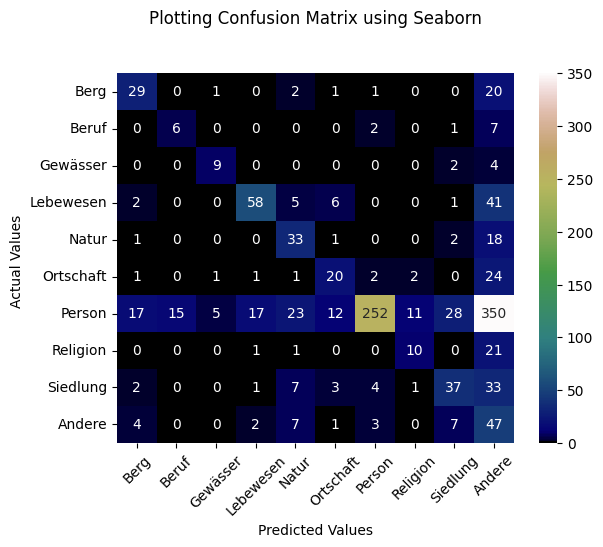

In [272]:
import seaborn as sebrn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as atlas

labels = [ 'Berg', 'Beruf', 'Gewässer', 'Lebewesen', 'Natur', 'Ortschaft', 'Person',
          'Religion','Siedlung',   'Andere']

y_true = confusion.instance
y_pred = confusion.classif
conf_matrix = (confusion_matrix(y_true, y_pred, labels= labels))

# Using Seaborn heatmap to create the plot
fx = sebrn.heatmap(conf_matrix, annot=True, cmap='gist_earth', fmt='')

# labels the title and x, y axis of plot
fx.set_title('Plotting Confusion Matrix using Seaborn\n\n');
fx.set_xlabel('Predicted Values')
fx.set_ylabel('Actual Values ');
fx.set_xticklabels(labels, rotation=45)
fx.set_yticklabels(labels, rotation=0)

# labels the boxes


atlas.show()


In [ ]:
# Add F1 score and some other measurments!

In [277]:
confusion_all.to_csv(r'C:\CAS_Arbeit\cassda-zertifikatsarbeit\Evaluation\data\out_verif.csv', encoding='UTF-8-SIG', sep=';')